In [6]:
import numpy as np
import pandas as pd 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
data=pd.read_csv('blogdataset.csv')

In [8]:
#check how many rows and column we have
data.shape

(99, 706)

In [9]:
data=data.fillna(0)


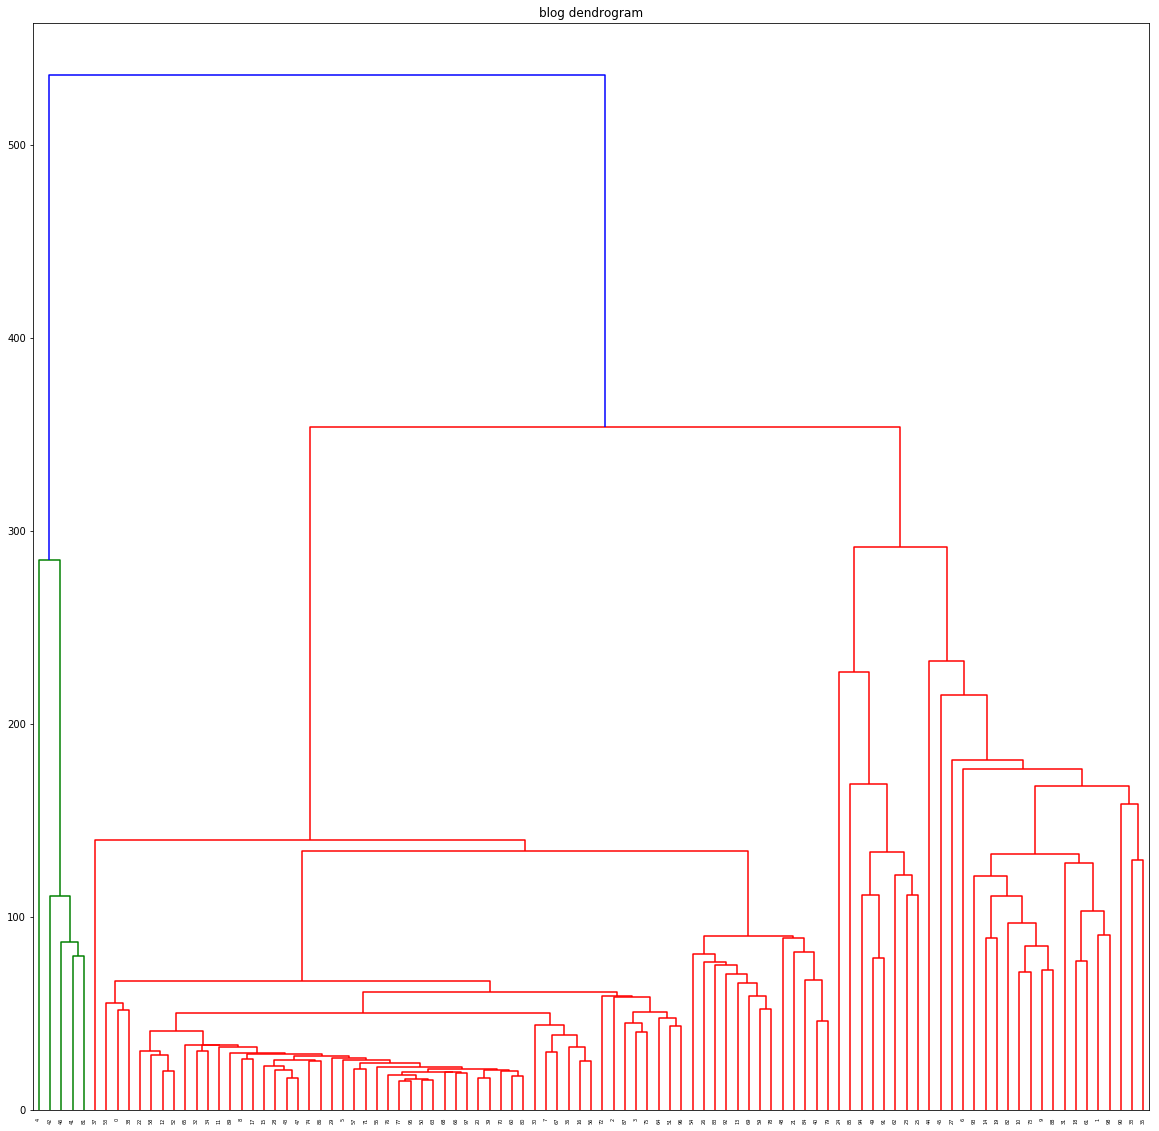

In [10]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,20))
plt.title('blog dendrogram')
dend=sch.dendrogram(sch.linkage(data,method='ward'))

In [11]:
from sklearn.cluster import AgglomerativeClustering as ac
hc=ac(n_clusters=3,affinity='euclidean',linkage='ward')
y_ac=hc.fit_predict(data)

In [12]:
len(data[y_ac==0]),len(data[y_ac==1]),len(data[y_ac==2])

(28, 5, 66)

# Grouping blogs using hirarhichal clustering

In [13]:
#read the data from file
def readfile(filename):
    #reading all file
    lines=[line for line in open(filename)]
    
    #colnames
    colnames=lines[0].split('\\')[1:]
    rownames=[]
    data=[]
    for line in lines[1:]:
        p=line.split('\t')[1:]
        #each row have it's own name it need to extracted here
        rownames.append(line.split('\t')[0])
        #now it appending data
        data.append([float(x) for x in p])
        #repeat again until it's death
    return colnames,rownames,data

    
    
    


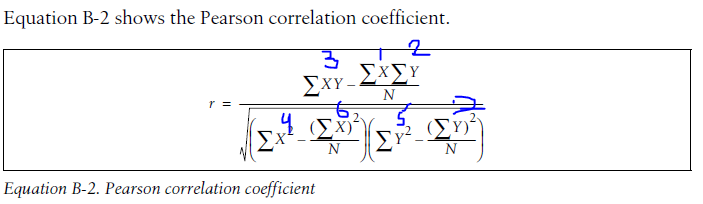

In [14]:
#deciding distance Equation 
from IPython.display import Image
Image(filename='E:/teturial/picture/pearson_distance.png',width=800,height=400)

In [15]:
from math import sqrt
def distance(v1,v2):
    #simple sum
    sum1=sum(v1)
    sum2=sum(v2)
    
    #sums of the squares 
    sum1sq=sum([pow(v,2) for v in v1])
    sum2sq=sum([pow(v,2) for v in v2])
    
    #sum of the products
    pSum=sum([v1[i]*v2[i] for i in range(len(v1))])
    
    #Calcuae a Pearson
    #numerator
    num=pSum-(sum1*sum2/len(v1))
    den=sqrt((sum1sq-pow(sum1,2)/len(v1))* (sum2sq-pow(sum2,2)/len(v1)))
    if den==0:return 0
    return 1.0-num/den #we use 1 to create some smaller distance between the item

# Sudo code for hirarichal clustering 

1 intilize all rows as separat cluster

2 find the smallest distance betweem two cluster

3 keep record of every two pair cluster 

4 mergtwo closes cluster

5 create new cluster by down up approach

6 delete the old closest cluster pari for next iteration


In [16]:
class bicluster:
    def __init__(self,vec,left=None,right=None,distance=0.0,id=None):
        self.left=left
        self.right=right
        self.id=id
        self.vec=vec
        self.distance=distance
    def hcluster(rows):
        distances={}
        currentclustid=-1
        #row as cluster
        clust=[bicluster(rows[i],id=i) for i in range(len(rows))]
        
        #looping through every pari 
        #=======================================================
        while len(clust)>1:
            lowestpair=(0,1)
            closest=distance(clust[0].vec,clust[1].vec)
            
            #this loop use for finding the lowest distance pair of node or cluster
            for i in range(len(clust)):#1st cluster
                for j in range(i+1,len(clust)):# rest of clusters
                    if (clust[i].id,clust[j].id) not in distances:
                        distances[(clust[i].id,clust[j].id)]=distance(clust[i].vec,clust[j].vec)
                    
                    d=distances[(clust[i].id,clust[j].id)]
                    if d<closest:
                        closest=d
                        lowestpair=(i,j)
            
            mergevec=[(clust[lowestpair[0]].vec[i]+clust[lowestpair[1]].vec[i])/2.0 for i in range(len(clust[0].vec))]
            
            newcluster=bicluster(mergevec,left=clust[lowestpair[0]],right=clust[lowestpair[1]],distance=closest,id=currentclustid)
            
            currentclustid-=1
            del clust[lowestpair[1]]
            del clust[lowestpair[0]]
            clust.append(newcluster)
        return clust[0]
    
    def printclust(clust,labels=None,n=0):
        for i in range(n):print(' ',end=' ')
        if clust.id<0:
            #negative id means that this is branch
            print('-',end=' ')
        else:
            #positive id means that this is an ednpoint
            if labels==None:
                print(clust.id,end=' ')
            else:
                print(labels[clust.id])
                
        #now print the right and left branches 
        if clust.left!=None:
            bicluster.printclust(clust.left,labels=labels,n=n+1)
        if clust.right!=None:
            bicluster.printclust(clust.right,labels=labels,n=n+1)
            
wordname,blognames,data=readfile('bloogdatatxt.txt')
clust=bicluster.hcluster(data)


In [17]:
bicluster.printclust(clust,blognames)

-   gapingvoid: "cartoons drawn on the back of business cards"
  -     -       Schneier on Security
      Instapundit.com
    -       The Blotter
      -         -           MetaFilter
          -             SpikedHumor
            -               Captain's Quarters
              -                 Michelle Malkin
                -                   -                     NewsBusters.org - Exposing Liberal Media Bias
                    -                       -                         Hot Air
                        Crooks and Liars
                      -                         Power Line
                        Think Progress
                  -                     Andrew Sullivan | The Daily Dish
                    -                       Little Green Footballs
                      -                         Eschaton
                        -                           Talking Points Memo: by Joshua Micah Marshall
                          Daily Kos
        -           43 Folders
 

# Drawing dendrogram

In [23]:
from PIL import Image,ImageDraw

In [30]:
class dendrogram:
    def getheight(self,clust):
        if clust.left==None and clust.right==None:
            return 1
        return self.getheight(clust.right)+self.getheight(clust.left)
    def getdepth(self,clust):
        if clust.left==None and clust.right==None:
            return 0
        return max(self.getdepth(clust.left),self.getdepth(clust.right))+ clust.distance
    def drowdendrogram(self,clust,labels,jpeg='cluster.jpg'):
        h=self.getheight(clust)*10
        w=1200
        depth=self.getdepth(clust)
        
        scalling=float(w-150)/depth
        
        img=Image.new("RGB",(w,h),(255,255,255))
        draw=ImageDraw.Draw(img)
        
        draw.line((10,10,100,1000),fill=(255,0,0,0))
        img.save(jpeg,'JPEG')
        
obj=dendrogram()
obj.drowdendrogram(clust,blognames,jpeg='blogcluster.jpg')
